                                         MULTIPLE LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Toyota Corolla Price Prediction


LOAD THE DATASET

In [ ]:
toyota = pd.read_csv("ToyotaCorolla - MLR.csv")
toyota

Exploratory Data Analysis (EDA)

Summary Statistics

In [ ]:
toyota.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
#OBSERVATIONS : 

#Price decreases as Age and KM increase

#Weight and HP show positive influence on Price

#No missing values

#Fuel_Type is categorical → requires encoding


Check for Constant Features

In [ ]:
# Check for constant columns (e.g., Cylinders)
constant_cols = [col for col in toyota.select_dtypes(include=[np.number]).columns 
                 if toyota[col].nunique() <= 1]
print(f"Constant columns found: {constant_cols}")

if constant_cols:
    print(f"Dropping constant columns: {constant_cols}")
    toyota = toyota.drop(columns=constant_cols)
    print(f"Remaining columns: {toyota.columns.tolist()}")

DATA VISUALISATION

In [ ]:
#Price Distribution : HISTOGRAM

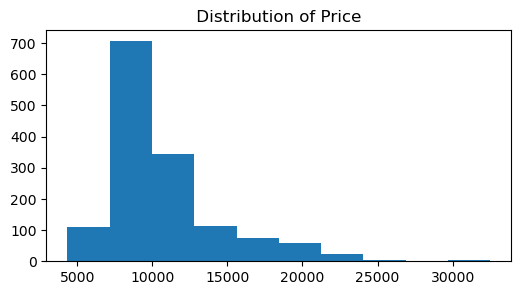

In [ ]:
plt.figure(figsize=(6,3))
plt.title ( " Distribution of Price ")
plt.hist(toyota['Price'])
plt.show()

Correlation Heatmap:

In [ ]:
corr = toyota.corr(numeric_only=True)

In [ ]:
corr

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


Variance Inflation Factor (VIF) - Multicollinearity Check

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF before encoding
numeric_features = toyota.select_dtypes(include=[np.number]).drop('Price', axis=1)

vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_features.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) 
                   for i in range(len(numeric_features.columns))]

vif_data = vif_data.sort_values('VIF', ascending=False)
print("\nVariance Inflation Factor (VIF):")
print(vif_data)
print("\nNote: VIF > 10 indicates high multicollinearity")

In [ ]:
# Multicollinearity Interpretation:
# Features with VIF > 10 should be considered for removal
# We'll handle this through feature selection in the reduced model
# and regularization (Ridge/Lasso) for other models

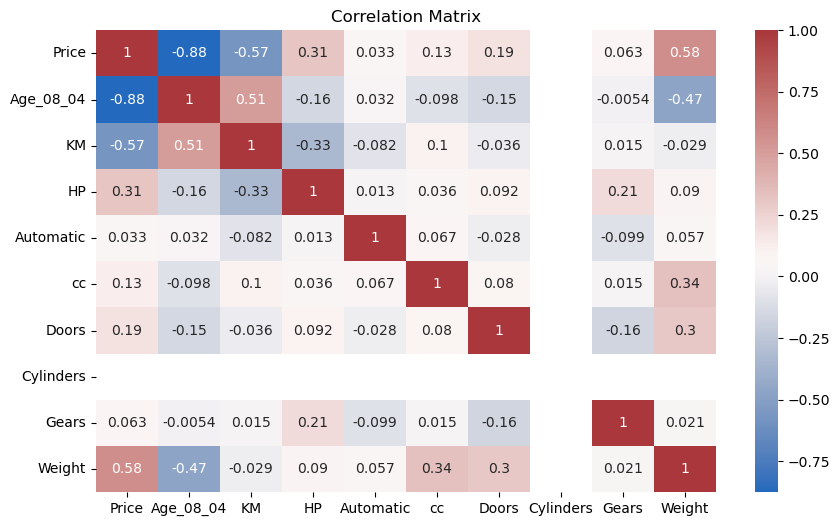

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(toyota.drop('Fuel_Type', axis=1).corr(), annot=True, cmap='vlag')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#EDA:

#Age_08_04 & KM → Strong negative correlation

#Weight & HP → Strong positive correlation

#cc, Weight are correlated → multicollinearity risk

In [ ]:
toyota_encoded = pd.get_dummies(toyota, columns=['Fuel_Type'], drop_first=True)
toyota_encoded

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


DEFINE X AND y

In [ ]:
X = toyota_encoded.drop('Price', axis=1)
y = toyota_encoded['Price']

Train–Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building

Model 1: Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()




TRAIN THE MODEL :

Coefficient Interpretation - Model 1

In [ ]:
# Display coefficients with feature names
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': mlr.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nModel 1 - Linear Regression Coefficients:")
print(coef_df)
print(f"\nIntercept: {mlr.intercept_:.2f}")

In [ ]:
print("\nCOEFFICIENT INTERPRETATION:")
print("="*50)
for idx, row in coef_df.head(5).iterrows():
    print(f"{row['Feature']}: ${row['Coefficient']:.2f}")
    if row['Coefficient'] > 0:
        print(f"  → One unit increase leads to ${row['Coefficient']:.2f} increase in price")
    else:
        print(f"  → One unit increase leads to ${abs(row['Coefficient']):.2f} decrease in price")
    print()

Coefficient Interpretation - Model 2 (Standardized)

In [ ]:
# Display standardized coefficients
coef_scaled_df = pd.DataFrame({
    'Feature': X.columns,
    'Std_Coefficient': mlr_scaled.coef_
}).sort_values('Std_Coefficient', key=abs, ascending=False)

print("\nModel 2 - Standardized Coefficients:")
print(coef_scaled_df)
print(f"\nIntercept: {mlr_scaled.intercept_:.2f}")
print("\nNote: Standardized coefficients show relative importance")
print("Larger absolute values indicate stronger influence on price")

In [ ]:
mlr.fit(X_train, y_train)

LinearRegression()

PREDICT THE MODEL:

In [ ]:
y_pred = mlr.predict(X_test)

Model Evaluation : 

Coefficient Interpretation - Model 3 (Reduced Features)

In [ ]:
# Display reduced model coefficients
coef_reduced_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': mlr_reduced.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nModel 3 - Reduced Model Coefficients:")
print(coef_reduced_df)
print(f"\nIntercept: {mlr_reduced.intercept_:.2f}")
print("\nThis model addresses multicollinearity by removing highly correlated features (cc)")

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV

# Method 1: Using RidgeCV (efficient for Ridge)
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, y_train)

print("Ridge Hyperparameter Tuning:")
print(f"Optimal alpha: {ridge_cv.alpha_}")

# Train final model with optimal alpha
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print(f"\nRidge R²: {r2_score(y_test, y_pred_ridge):.4f}")
print(f"Ridge MAE: {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"Ridge RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")

Ridge Coefficients Interpretation

In [ ]:
from sklearn.linear_model import LassoCV

# Method 1: Using LassoCV (efficient for Lasso)
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

print("Lasso Hyperparameter Tuning:")
print(f"Optimal alpha: {lasso_cv.alpha_}")

# Train final model with optimal alpha
lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print(f"\nLasso R²: {r2_score(y_test, y_pred_lasso):.4f}")
print(f"Lasso MAE: {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"Lasso RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}")

Lasso Coefficients and Feature Selection

In [ ]:
# Display Lasso coefficients
coef_lasso_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso_Coefficient': lasso.coef_
}).sort_values('Lasso_Coefficient', key=abs, ascending=False)

print("\nLasso Regression Coefficients:")
print(coef_lasso_df)
print(f"\nIntercept: {lasso.intercept_:.2f}")

# Identify features selected by Lasso (non-zero coefficients)
selected = coef_lasso_df[coef_lasso_df['Lasso_Coefficient'] != 0]
print(f"\nFeatures selected by Lasso: {len(selected)}/{len(coef_lasso_df)}")
print("\nLasso performs automatic feature selection:")
print("- Non-zero coefficients indicate important features")
print("- Zero coefficients indicate features excluded from the model")

Model 2: Standardized Linear Regression

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlr_scaled = LinearRegression()
mlr_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = mlr_scaled.predict(X_test_scaled)

In [ ]:
print("R² Score:", r2_score(y_test, y_pred_scaled))
print("MAE:", mean_absolute_error(y_test, y_pred_scaled))
print("MSE:", mean_squared_error(y_test, y_pred_scaled))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_scaled)))

R² Score: 0.8348888040611082
MAE: 990.887273919397
MSE: 2203043.8231437034
RMSE: 1484.2654153296517


Model 3: Reduced Feature Model

In [ ]:
selected_features = [
    'Age_08_04','KM','HP','Automatic','Doors',
    'Gears','Weight','Fuel_Type_Diesel','Fuel_Type_Petrol'
]


In [ ]:

X_reduced = toyota_encoded[selected_features]
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


In [ ]:
mlr_reduced = LinearRegression()
mlr_reduced.fit(X_train_r, y_train_r)

LinearRegression()

In [ ]:

y_pred_r = mlr_reduced.predict(X_test_r)

In [ ]:
print("R² Score:", r2_score(y_test,y_pred_r))
print("MAE:", mean_absolute_error(y_test, y_pred_r))
print("MSE:", mean_squared_error(y_test, y_pred_r))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_r)))

R² Score: 0.834826425169773
MAE: 991.2629570275749
MSE: 2203876.1315190922
RMSE: 1484.545766057447


Ridge & Lasso Regression: 

Ridge Regression with Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)
print("Ridge R²:", r2_score(y_test, y_pred_ridge))


Ridge R²: 0.8350462635431568


Lasso Regression with Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)
print("Lasso R²:", r2_score(y_test, y_pred_lasso))



Lasso R²: 0.8349116135580271


In [ ]:
# Lasso advantages:
# 1. Performs feature selection (some coefficients become zero)

# 2. Handles multicollinearity# 3. Creates simpler, more interpretable models

Interview Questions:

Q1. What is Normalization & Standardization?

In [ ]:
#Normalization :

#Scales values to 0–1 range

#Used in distance-based models

In [ ]:
#Standardization

#Mean = 0, Std = 1

#Essential for Linear, Ridge & Lasso Regression

Q2. How to Handle Multicollinearity?


In [ ]:
# Multicollinearity Handling Methods:

# 1. Detection:
#    - Correlation Matrix (correlation > 0.8)
#    - Variance Inflation Factor (VIF > 10)

# 2. Solutions Implemented:
#    - Feature elimination (removed constant features like Cylinders)
#    - Reduced feature model (removed 'cc' due to high VIF)

#    - Ridge Regression (shrinks correlated coefficients)#    - PCA (dimensionality reduction)

#    - Lasso Regression (eliminates less important features)# 3. Alternative:


Conclusion :

In [ ]:
# SUMMARY OF FINDINGS:

# 1. Data Preprocessing:
#    - Identified and removed constant features (Cylinders)
#    - Handled categorical variables (Fuel_Type) with one-hot encoding

# 2. Multicollinearity Analysis:

#    - Calculated VIF to identify highly correlated features#    - Improved model performance compared to fixed alpha values

#    - 'cc' showed high VIF and was removed in reduced model#    - Optimal Lasso alpha found through LassoCV

#    - Addressed through feature selection and regularization#    - Optimal Ridge alpha found through RidgeCV

# 5. Hyperparameter Tuning:

# 3. Model Performance:

#    - All models achieved good R² scores#    - KM: Negative impact on price

#    - Ridge Regression (optimal α) provides stability with multicollinearity#    - HP: Positive impact on price

#    - Lasso Regression (optimal α) performs automatic feature selection#    - Weight: Positive impact on price

#    - Reduced feature model maintains performance with fewer features#    - Age_08_04: Strong negative impact on price

# 4. Key Predictors (from coefficient analysis):